In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols


In [2]:
classes = ["elliptical", "spiral"]
img_channels = list("ugriz")

# roughly 18000 files in each category

# WARNING! - Loading all the imgaes uses lots of RAM
num_images = 10000  

def load_images():
    img_data = []
    labels = []
    for aClass in classes:
        files = glob.glob("final_data/"+aClass+"/*.npz")
        
        assert num_images < len(files), 'There are not this many images - try a smaller number!'
        
        chosen_files = np.random.choice(files, num_images/2, replace=False)
        
        
        for file_name in chosen_files:
            img = np.load(file_name)
            img = np.array(list(map(lambda channel: img[channel], img_channels)))
            img_data.append(img)
            labels.append(classes.index(aClass))

    return img_data, labels

img_data, labels = load_images()
img_data = np.array(img_data)
labels = np.array(labels)


In [3]:
len(labels)

10000

In [5]:
#shuffle the data
shuffle = np.arange(img_data.shape[0])
np.random.shuffle(shuffle)
img_data = img_data[shuffle]
labels = labels[shuffle]
print(f"img_data shape: {img_data.shape}")
# img_data = np.transpose(img_data, (0, 2, 3, 1))
# img_data = img_data/np.amax(img_data)
print(img_data.shape)
print(labels.shape)

img_data shape: (10000, 5, 200, 200)
(10000, 5, 200, 200)
(10000,)


img_data shape: (10000, 5, 200, 200)
Galaxy type: spiral


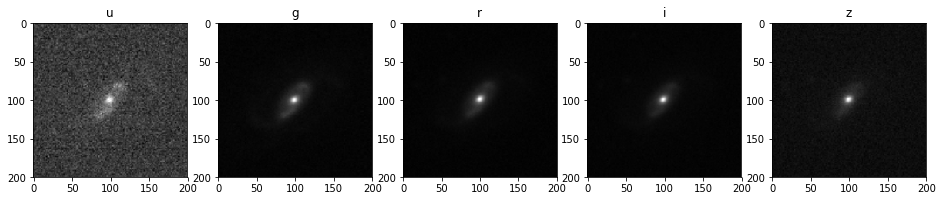

In [6]:
print(f"img_data shape: {img_data.shape}")
img_data = np.transpose(img_data, (0, 2, 3, 1))

fig=plt.figure(figsize=(16, 16))
columns = len(img_channels)
rows = 1
print(f"Galaxy type: {classes[labels[0]]}")
for i in range(0, len(img_channels)):
    img = img_data[0]
    fig.add_subplot(rows, columns, i+1)
    plt.title(img_channels[i])
    #using gray because I'm not sure how a single channel that is not even part of RGB should be displayed
    plt.imshow(img[:,:,i], cmap="gray")
plt.show()

In [7]:
u_av = []
g_av = []
r_av = []
i_av = []
z_av = []

avs = [u_av, g_av, r_av, i_av, z_av]
galaxy_num = []
for i in range(len(img_data)):

    img = img_data[i]
    galaxy_num.append(i)
    for j in range(5):
        channel_av = np.mean(img[:,:,j])
        avs[j].append(channel_av)

avs = np.array(avs)
avs = np.swapaxes(avs, 0, 1)


In [8]:
df = pd.DataFrame(avs)
df.columns = img_channels
df['label'] = labels
df.head()

,u,g,r,i,z,label
0,1028.495325,1116.144150,1241.233275,1388.00420,1200.928100,1
1,1021.931150,1070.743425,1128.794925,1157.95160,1076.733675,1
2,1029.715025,1069.935575,1176.270350,1278.67895,1260.874825,1
3,1012.687825,1060.446425,1103.869350,1144.74860,1062.006100,0
4,1022.637775,1061.401825,1144.340575,1223.44885,1125.099675,1


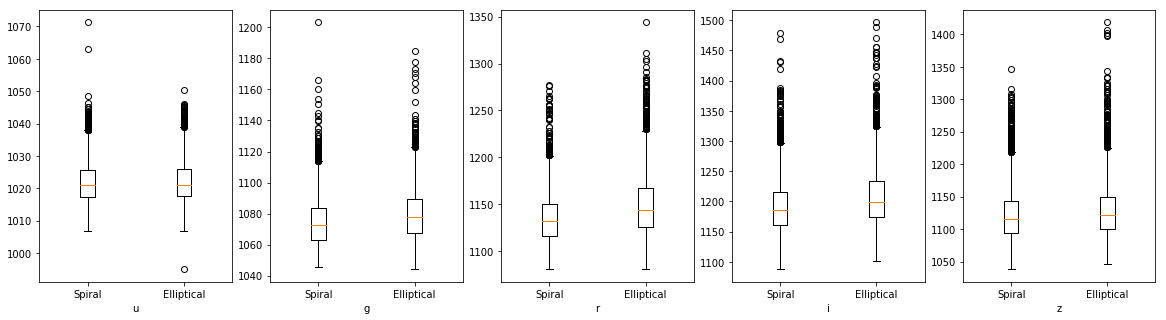

In [14]:
spirals = df.where(df['label'] == 1).dropna()
ellipticals = df.where(df['label'] == 0).dropna()

fig, axes = plt.subplots(1,5, figsize=(20,5))

for i in range(5):

    ax = axes[i]
    ax.boxplot([spirals[img_channels[i]], ellipticals[img_channels[i]]])
    ax.set_xlabel(img_channels[i])
    ax.set_xticklabels(['Spiral', 'Elliptical'])

plt.show()

u        1022.019934
g        1074.360549
r        1135.391545
i        1193.272419
z        1123.545974
label       1.000000
dtype: float64


u        1022.267006
g        1079.466263
r        1147.976488
i        1208.506630
z        1129.273578
label       0.000000
dtype: float64


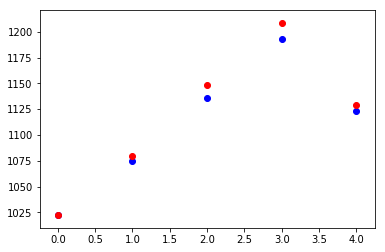

In [15]:
spiral_means = np.mean(df.where(df['label'] == 1))

elliptical_means = np.mean(df.where(df['label'] == 0))

display(spiral_means)
print()
print(elliptical_means)
plt.scatter(range(5), spiral_means[0:5], c='b')
plt.scatter(range(5), elliptical_means[0:5], c='r')

In [11]:
ols('label ~ u + g + r + i + z', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     154.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          8.62e-159
Time:                        16:47:52   Log-Likelihood:                -6885.2
No. Observations:               10000   AIC:                         1.378e+04
Df Residuals:                    9994   BIC:                         1.383e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9314      0.916    -10.841      0.000     -11.727      -8.136
u              0.0168      0.001     14.408      0.000       0.014       0.019
g              0.0005      0.001      0.656      0.512      -0.001       0.002
r             -0.0077      0.000    -15.729      0.000      -0.009      -0.007
i              0.0012      0.000      4.949      0.000       0.001       0.002
z              0.0002      0.000      0.854      0.393      -0.000       0.001
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.865   Jarque-Bera (JB):             1251.847
Skew:                          -0.013   Prob(JB):                    1.46e-272
Kurtosis:                       1.267   Cond. No.                     4.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

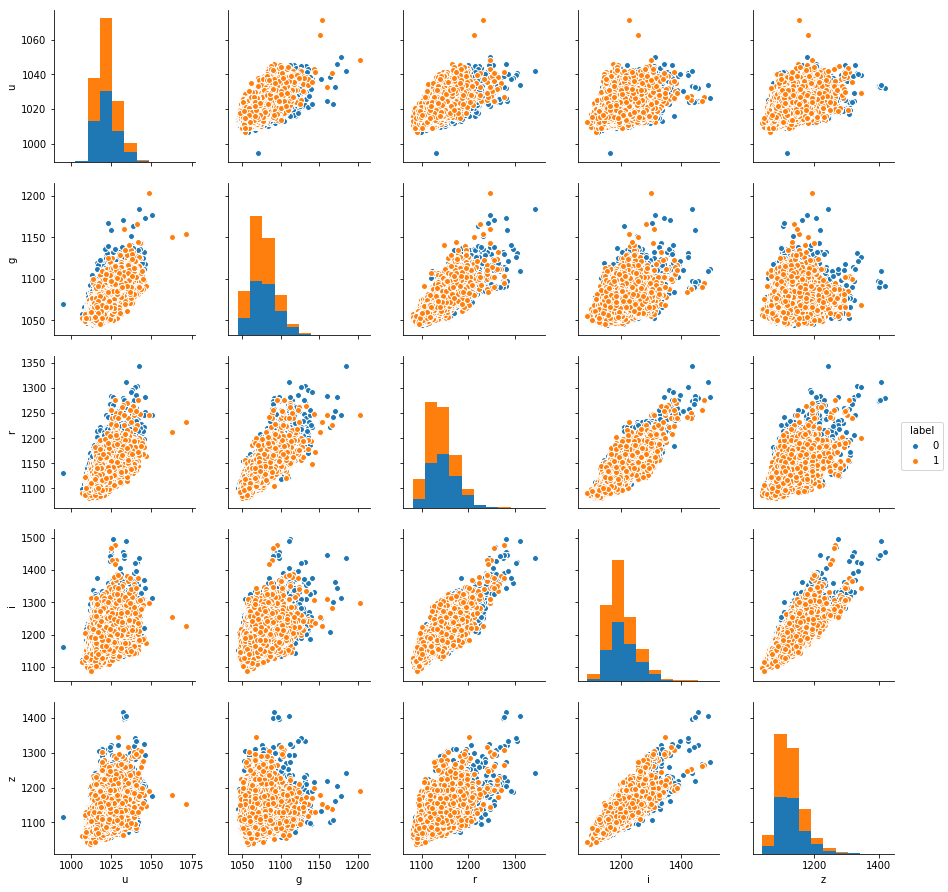

In [12]:
sns.pairplot(data=df, hue='label', vars=list('ugriz'))